In [8]:
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

import numpy as np

from linearmodels.panel import PanelOLS
import datetime as dt

# Characteristics Random Forest



In [33]:
#decide which df to use
df = pd.read_csv("Dataframes/economic_story_dataframe.csv")
#df = df.loc[:, ["Instrument", "Date", "Earnings Per Share - Actual Surprise", "Revenue - Actual", "Net Income after Tax"]]

df

,Instrument,Date,GICS Industry Group Name,Earnings Per Share - Actual,Earnings Per Share - Mean,Earnings Per Share - Actual Surprise,Earnings Per Share – Coefficient of Variation,Market Capitalization,Revenue - Actual,Enterprise Value,...,"WACC Inflation Adjusted Risk Free Rate, (%)",Net Income after Tax,Price Target - Mean,Price Target - Standard Deviation,Price Close,Enterprise Value To Sales (Daily Time Series Ratio),3 Month Total Return,Volume,Unemployment rate_x,Unemployment rate_y
0,AVY.N,2013-01-01,Materials,0.54,0.48571,11.178,3.625620,3.426001e+09,1.532200e+09,4.413001e+09,...,NaN,33400000.0,36.00000,2.44949,34.92,0.799347,10.637479,207295.0,8.0,8.0
1,AVY.N,2013-04-01,Materials,0.59,0.57571,2.482,2.046169,4.309428e+09,1.498900e+09,5.459128e+09,...,NaN,66800000.0,42.57143,3.92272,43.07,0.895787,24.148726,0.0,7.6,7.6
2,AVY.N,2013-07-01,Materials,0.71,0.70250,1.068,1.551601,4.258229e+09,1.552300e+09,5.436229e+09,...,NaN,70800000.0,45.00000,4.30946,42.76,0.906078,-0.054218,0.0,7.3,7.3
3,AVY.N,2013-10-01,Materials,0.69,0.63833,8.095,2.775994,4.273414e+09,1.504900e+09,5.029514e+09,...,NaN,62000000.0,47.71429,3.45230,43.52,0.903176,2.467620,236291.0,7.2,7.2
4,AVY.N,2014-01-01,Materials,0.69,0.68000,1.471,3.204412,4.877168e+09,1.583900e+09,5.553068e+09,...,NaN,42100000.0,54.62500,3.42555,50.19,0.920659,16.003852,157761.0,6.6,6.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20115,POOL.OQ,2021-10-01,Retailing,4.51,3.84833,17.194,2.836295,1.742020e+10,1.411448e+09,1.769954e+10,...,1.527139,184573000.0,545.28571,50.48823,434.41,3.684400,-5.130322,157740.0,4.5,4.5
20116,POOL.OQ,2022-01-01,Retailing,2.63,1.87500,40.267,3.269867,2.268979e+10,1.035557e+09,2.384882e+10,...,1.515266,107542000.0,571.00000,41.33833,566.00,4.504382,30.489705,82349.0,4.0,4.0
20117,POOL.OQ,2022-04-01,Retailing,4.23,3.14867,34.342,6.630736,1.696712e+10,1.412650e+09,1.843682e+10,...,2.325202,179203000.0,519.88889,37.49206,422.85,3.422880,-25.160664,290897.0,3.6,3.6
20118,POOL.OQ,2022-07-01,Retailing,7.63,7.51700,1.503,3.625249,1.405795e+10,2.055818e+09,1.556187e+10,...,3.092855,307205000.0,435.37500,57.57373,351.23,2.749481,-21.661570,185584.0,3.5,3.5


#### OLS Regression

In [34]:
#identifying outliers and replacing them with NA
summary_stats = df["Earnings Per Share - Actual Surprise"].describe()
Q1 = summary_stats.loc['25%']
Q3 = summary_stats.loc['75%']
IQR = Q3 - Q1
threshold = 7 #1.5 is standard threshold but we still want to keep enough variation in the data so setting threshol higher here
surprise_outliers_removed = df["Earnings Per Share - Actual Surprise"].loc[~((df["Earnings Per Share - Actual Surprise"] < (Q1 - threshold * IQR)) | (df["Earnings Per Share - Actual Surprise"] > (Q3 + threshold * IQR)))]
df_accuracy_new = df.copy()
df_accuracy_new["Earnings Per Share - Actual Surprise"] = surprise_outliers_removed
df_accuracy_new = df_accuracy_new.dropna(subset=["Earnings Per Share - Actual Surprise"])
#df_accuracy_new["Recommendation - Mean (1-5)"] = df_accuracy_new["Recommendation - Mean (1-5)"].fillna(0)
df_accuracy_new = df_accuracy_new.dropna()


In [35]:
df_accuracy_new.value_counts("GICS Industry Group Name")

GICS Industry Group Name
Capital Goods                                     1064
Health Care Equipment & Services                   894
Software & Services                                880
Utilities                                          779
Pharmaceuticals, Biotechnology & Life Sciences     675
Diversified Financials                             666
Materials                                          637
Insurance                                          591
Real Estate                                        565
Food, Beverage & Tobacco                           553
Energy                                             547
Retailing                                          530
Semiconductors & Semiconductor Equipment           507
Banks                                              454
Media & Entertainment                              420
Consumer Services                                  398
Transportation                                     389
Technology Hardware & Equipment         

In [39]:
#for_rf = df_accuracy_new.iloc[:25,:]
for_rf = df_accuracy_new[df_accuracy_new['GICS Industry Group Name'] == 'Technology Hardware & Equipment']
#.iloc[0:38, :]


# print the reversed DataFrame
for_rf

,Instrument,Date,GICS Industry Group Name,Earnings Per Share - Actual,Earnings Per Share - Mean,Earnings Per Share - Actual Surprise,Earnings Per Share – Coefficient of Variation,Market Capitalization,Revenue - Actual,Enterprise Value,...,"WACC Inflation Adjusted Risk Free Rate, (%)",Net Income after Tax,Price Target - Mean,Price Target - Standard Deviation,Price Close,Enterprise Value To Sales (Daily Time Series Ratio),3 Month Total Return,Volume,Unemployment rate_x,Unemployment rate_y
1492,JNPR.N,2016-01-01,Technology Hardware & Equipment,0.63,0.59457,5.960,1.619658,1.061018e+10,1.319600e+09,1.059958e+10,...,2.304994,197800000.0,32.00000,3.27042,27.60,2.279275,7.705871,1146460.0,4.8,4.8
1493,JNPR.N,2016-04-01,Technology Hardware & Equipment,0.37,0.38439,-3.744,9.628242,9.854964e+09,1.097900e+09,9.741364e+09,...,1.829833,91400000.0,26.96087,3.55806,25.51,2.026507,-7.196742,1492712.0,5.1,5.1
1494,JNPR.N,2016-07-01,Technology Hardware & Equipment,0.50,0.46996,6.392,2.595966,8.634925e+09,1.221300e+09,8.423425e+09,...,1.491713,140000000.0,26.82174,4.14718,22.49,1.743208,-11.455683,1124752.0,4.8,4.8
1495,JNPR.N,2016-10-01,Technology Hardware & Equipment,0.58,0.51711,12.162,2.426950,9.214082e+09,1.285300e+09,9.025482e+09,...,1.606498,172400000.0,27.28182,4.06869,24.06,1.841998,7.441409,1014103.0,4.9,4.9
1496,JNPR.N,2017-01-01,Technology Hardware & Equipment,0.66,0.63171,4.478,2.203543,1.074793e+10,1.385600e+09,1.029613e+10,...,2.431507,188900000.0,28.81250,4.48798,28.26,2.144419,17.894956,0.0,4.7,4.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18795,WDC.OQ,2021-10-01,Technology Hardware & Equipment,2.49,2.44781,1.724,2.917302,1.778504e+10,5.051000e+09,2.301604e+10,...,1.527139,610000000.0,83.53200,17.74848,56.44,1.355487,-20.696923,1161068.0,4.5,4.5
18796,WDC.OQ,2022-01-01,Technology Hardware & Equipment,2.30,2.12584,8.193,1.944173,2.032093e+10,4.833000e+09,2.509793e+10,...,1.515266,564000000.0,74.08000,12.62353,65.21,1.415541,15.538625,748176.0,4.0,4.0
18797,WDC.OQ,2022-04-01,Technology Hardware & Equipment,1.65,1.47652,11.749,3.006393,1.514209e+10,4.381000e+09,1.979909e+10,...,2.325202,25000000.0,68.74042,13.26495,49.65,1.072455,-23.861371,995235.0,3.6,3.6
18798,WDC.OQ,2022-07-01,Technology Hardware & Equipment,1.78,1.72646,3.101,4.166329,1.359775e+10,4.528000e+09,1.829275e+10,...,3.092855,301000000.0,65.15708,13.32010,44.83,0.974528,-11.438167,1335976.0,3.5,3.5


In [40]:
corr_matrix = for_rf.corr()

C:\Users\alexa\AppData\Local\Temp\ipykernel_27044\669085487.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = for_rf.corr()


<AxesSubplot: >

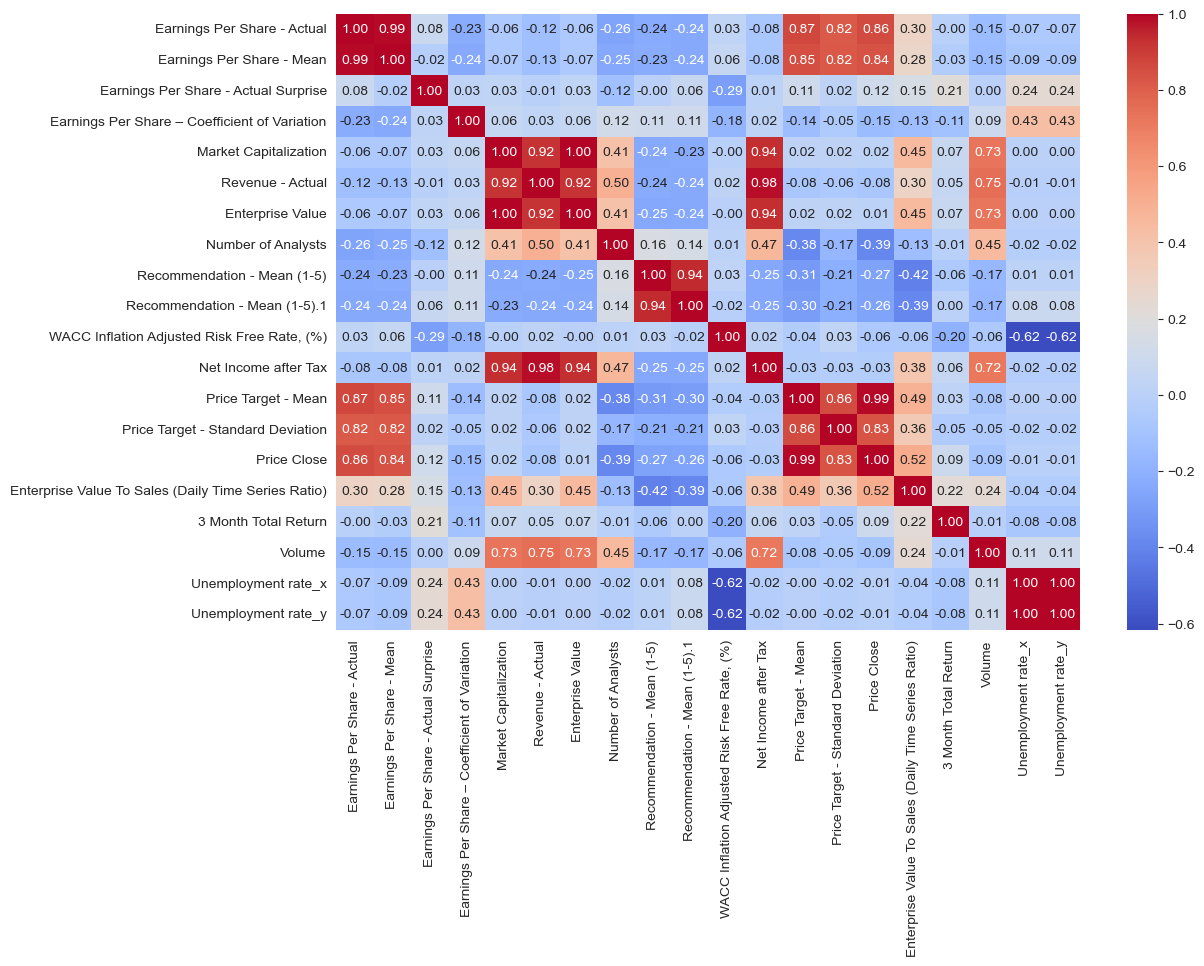

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# plot a heatmap of the correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f')